# L'AMELIORATION D'IMAGE: 

###  Étape 1 : Installation des bibliothèques

###  Étape 2 : Charger une image 

In [ ]:
# Charger l'image
image = cv2.imread("votre_image.jpg")


### Étape 3: L'application des filtres :

### Filtre Moyen (Mean Filter) : 

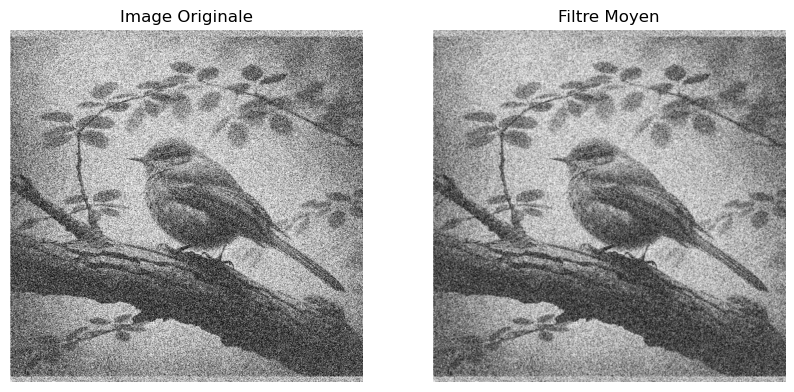

True

In [58]:
image_filtre_moyen = cv2.blur(image, (3, 3))

# Afficher l'image originale et l'image après l'application du filtre moyen
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Image Originale'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(image_filtre_moyen, cmap='gray'), plt.title('Filtre Moyen'), plt.axis('off')
plt.show()

# Enregistrer l'image résultante
cv2.imwrite('image_filtre_moyen_resultat.png', image_filtre_moyen)



### Filtre Médian (Median Filter)  

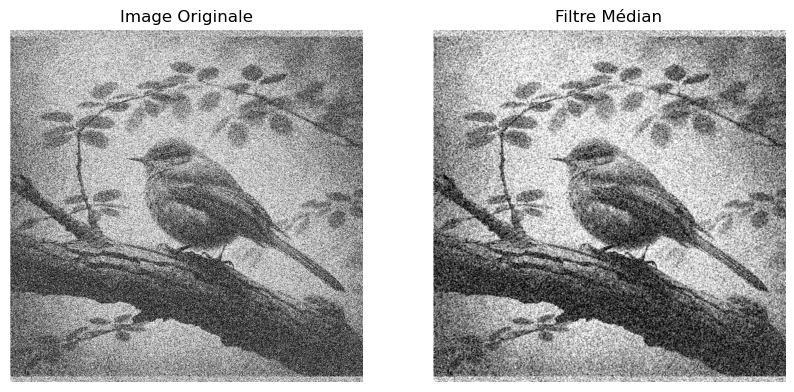

True

In [59]:
# Appliquer un filtre médian avec une taille de noyau de 3x3 (vous pouvez ajuster la taille du noyau selon vos besoins)
image_filtre_median = cv2.medianBlur(image, 3)

# Afficher l'image originale et l'image après l'application du filtre médian
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Image Originale'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(image_filtre_median, cmap='gray'), plt.title('Filtre Médian'), plt.axis('off')
plt.show()

# Enregistrer l'image résultante
cv2.imwrite('image_filtre_median_resultat.png', image_filtre_median)

### Filtre Gaussien :

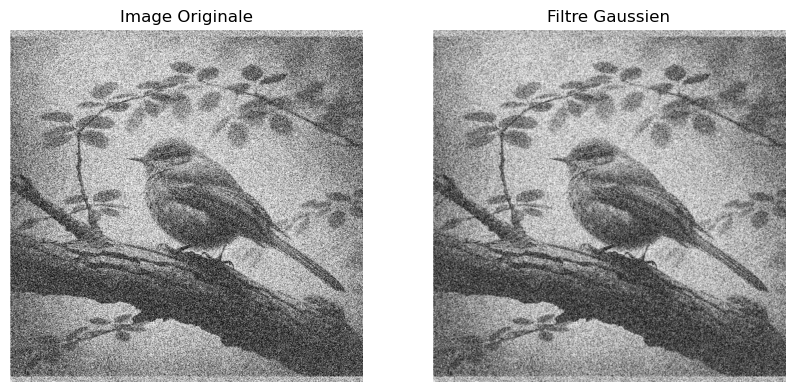

True

In [66]:
# Appliquer un filtre gaussien avec un noyau de taille 3x3 (vous pouvez ajuster la taille du noyau selon vos besoins)
image_filtre_gaussien = cv2.GaussianBlur(image, (3, 3), 0)

# Afficher l'image originale et l'image après l'application du filtre gaussien
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Image Originale'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(image_filtre_gaussien, cmap='gray'), plt.title('Filtre Gaussien'), plt.axis('off')
plt.show()

# Enregistrer l'image résultante
cv2.imwrite('image_filtre_gaussien_resultat.png', image_filtre_gaussien)

###  Filtre Maximum  

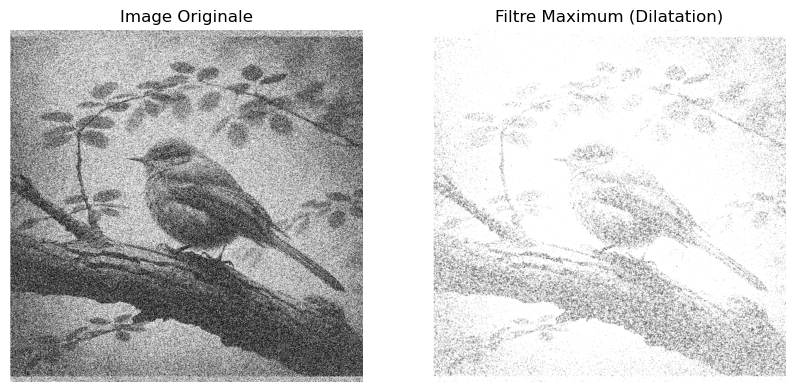

True

In [64]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Appliquer un filtre maximum (dilatation)
image_filtre_maximum = cv2.dilate(image, kernel, iterations=1)

# Afficher l'image originale et l'image après l'application du filtre maximum
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Image Originale'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(image_filtre_maximum, cmap='gray'), plt.title('Filtre Maximum (Dilatation)'), plt.axis('off')
plt.show()

# Enregistrer l'image résultante
cv2.imwrite('image_filtre_maximum_resultat.png', image_filtre_maximum)

### Filtre Nagao

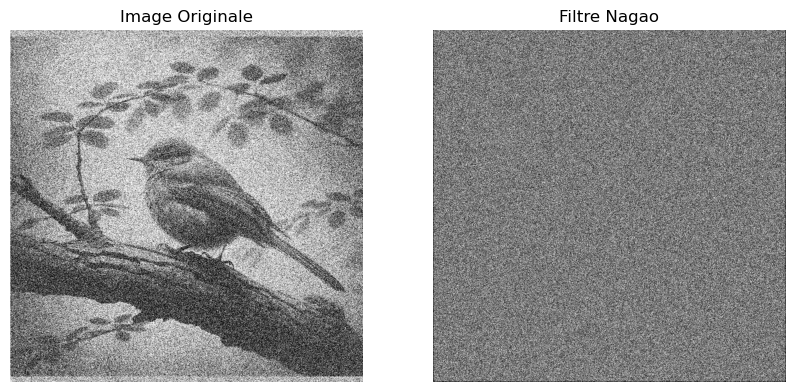

True

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def filtre_nagao(image):
    rows, cols = image.shape
    result = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Définir ici des coefficients de pondération pour le filtre Nagao
            weights = [-1, -1, -1, -1, 8, -1, -1, -1, -1]

            neighbors = [image[i - 1, j - 1], image[i - 1, j], image[i - 1, j + 1],
                         image[i, j - 1], image[i, j], image[i, j + 1],
                         image[i + 1, j - 1], image[i + 1, j], image[i + 1, j + 1]]

            result[i, j] = abs(np.dot(weights, neighbors))

    return result

# Charger l'image en niveaux de gris
image = cv2.imread("image_projet2.png", cv2.IMREAD_GRAYSCALE)

# Appliquer le filtre Nagao
image_filtre_nagao = filtre_nagao(image)

# Afficher l'image originale et l'image après l'application du filtre Nagao
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Image Originale'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(image_filtre_nagao, cmap='gray'), plt.title('Filtre Nagao'), plt.axis('off')
plt.show()

# Enregistrer l'image résultante
cv2.imwrite('image_filtre_nagao_resultat.png', image_filtre_nagao)


# EXTRACTION DE CONTOURS

### Étape 1 : Importation des bibliothèques 

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

### Étape 2 : Lecture et préparation de l’image

In [55]:
image = cv2.imread("image_projet2.png", cv2.IMREAD_GRAYSCALE)


### Méthode de Roberts: 

In [9]:
# Définir les masques de Roberts
roberts_cross_v = np.array([[1, 0],
[0, -1]])
roberts_cross_h = np.array([[0, 1],
[-1, 0]])
# Appliquer les masques de Roberts
edge_roberts_v = cv2.filter2D(image, -1, roberts_cross_v)
edge_roberts_h = cv2.filter2D(image, -1, roberts_cross_h)
# Calculer la magnitude des gradients
edge_roberts = np.sqrt(np.square(edge_roberts_v) + np.square(edge_roberts_h))

(-0.5, 1023.5, 1023.5, -0.5)

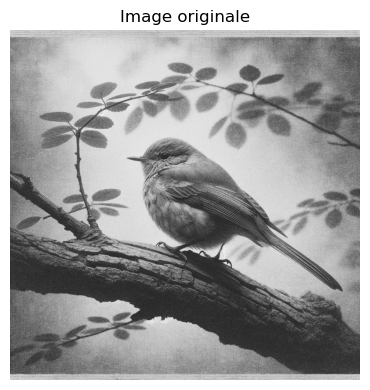

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Image originale')
plt.axis('off')


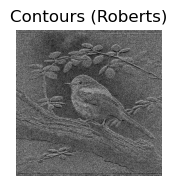

In [11]:
plt.subplot(2, 3, 2)
plt.imshow(edge_roberts, cmap='gray')
plt.title('Contours (Roberts)')
plt.axis('off')
plt.imsave("Image_originale_Roberts.jpg", edge_roberts, cmap='gray')

plt.show()

### Méthode de Sobel: 

In [12]:
# Appliquer Sobel x et y
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
# Calculer la magnitude des gradients
sobel = np.sqrt(np.square(sobelx) + np.square(sobely))

(-0.5, 1023.5, 1023.5, -0.5)

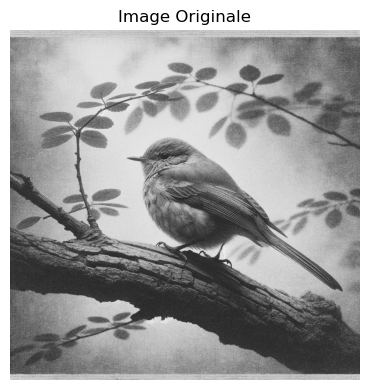

In [13]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3, 1)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.axis('off')




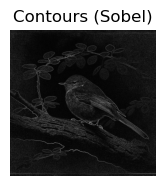

In [14]:
plt.subplot(2, 3, 2)
plt.imshow(sobel, cmap='gray')
plt.title('Contours (Sobel)')
plt.axis('off')
plt.imsave("image_originale_sobel.jpg", sobel, cmap='gray')

plt.show()

### Méthode de Prewitt:  

In [15]:
# Définir les masques de Prewitt
prewittx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitty = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
# Appliquer les masques de Prewitt
edge_prewitt_x = cv2.filter2D(image, -1, prewittx)
edge_prewitt_y = cv2.filter2D(image, -1, prewitty)
# Calculer la magnitude des gradients
edge_prewitt = np.sqrt(np.square(edge_prewitt_x) + np.square(edge_prewitt_y))

(-0.5, 1023.5, 1023.5, -0.5)

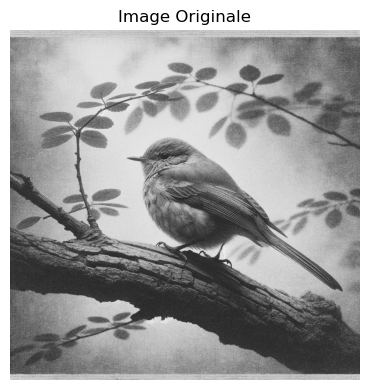

In [16]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.axis('off')



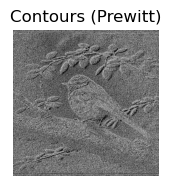

In [17]:
plt.subplot(2, 3, 2)
plt.imshow(edge_prewitt, cmap='gray')
plt.title('Contours (Prewitt)')
plt.axis('off')
plt.imsave("image_original_Prewitt.jpg",edge_prewitt, cmap='gray')

plt.show()

### Méthode de Canny: 

In [18]:
# Appliquer la détection de contours Canny
canny_edges = cv2.Canny(image, threshold1=50, threshold2=150)

(-0.5, 1023.5, 1023.5, -0.5)

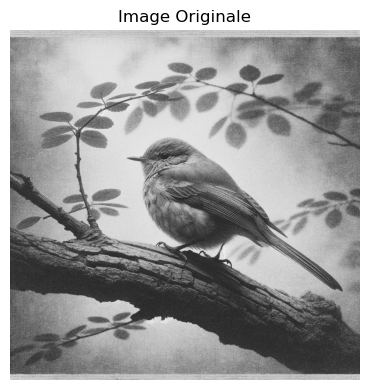

In [19]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.axis('off')


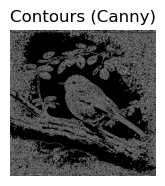

In [20]:
plt.subplot(2, 3, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Contours (Canny)')
plt.axis('off')
plt.imsave("image_originale_Canny.jpg", canny_edges , cmap='gray')

plt.show()

# EXTRACTION DE LIGNES 

### Étape 1 : Importation des bibliothèques

### Étape 2 : Lecture et préparation de l’image

In [26]:
# Charger une image en niveaux de gris
imageOR = cv2.imread('image_original.jpg', cv2.IMREAD_GRAYSCALE)

### Étape 3 : Détection des contours

In [27]:
edges = cv2.Canny(image, 50, 150, apertureSize=3)


### Étape 4 : Utilisation de la transformée de Hough pour détecter les lignes

In [28]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

### Étape 5 : Dessiner les lignes détectées sur l’image

In [32]:
# Créer une copie de l'image originale pour dessiner les lignes
image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for rho,theta in lines[:,0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)

### Étape 6 : Affichage des résultats

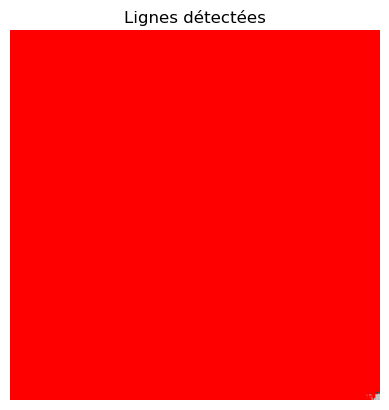

In [41]:
# Afficher l'image avec les lignes détectées
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Lignes détectées')
plt.axis('off')
plt.savefig("image_originale_Hough.jpg", bbox_inches='tight')
plt.show()

# EXTRACTION DE COINS:

### Étape 1 : Importation des Bibliothèques :

### Étape 2 : Lecture et Préparation de l’Image : 

In [47]:
# Charger l'image en niveaux de gris
image = cv2.imread('image_original.jpg', cv2.IMREAD_GRAYSCALE)

### Étape 3 : Application de l’Algorithme de Harris: 

In [51]:
# Appliquer l'algorithme de Harris
corners = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)
corners = cv2.dilate(corners, None)

### Étape 4 : Marquage des Coins sur l’Image: 

In [52]:
# Seuil pour les coins
threshold = 0.01 * corners.max()

# Créer une copie de l'image pour y dessiner les coins
image_with_corners = np.copy(image)

# Marquer chaque coin
for j in range(corners.shape[0]):
    for i in range(corners.shape[1]):
        if corners[j, i] > threshold:
            cv2.circle(image_with_corners, (i, j), 5, (255), -1)

### Étape 5 : Affichage des Résultats:

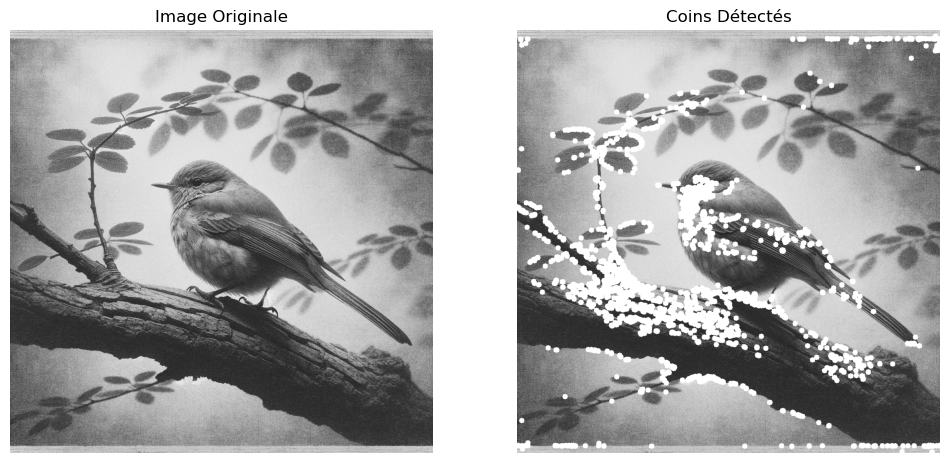

In [54]:
# Affichage des résultats de l'extraction de coins
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Image Originale'), plt.axis("off")
plt.subplot(122), plt.imshow(image_with_corners, cmap='gray'), plt.title('Coins Détectés'), plt.axis("off")
plt.savefig("image_corners_detected.jpg", bbox_inches='tight')
plt.show()

# Optimisation de la Luminosité

###  Importation des bibliothèques 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

### Lecture et préparation de l’image 

In [26]:
image = cv2.imread("image_projet1.png", cv2.IMREAD_GRAYSCALE)

## 	Histogramme égalisation (Histogram Equalization) :

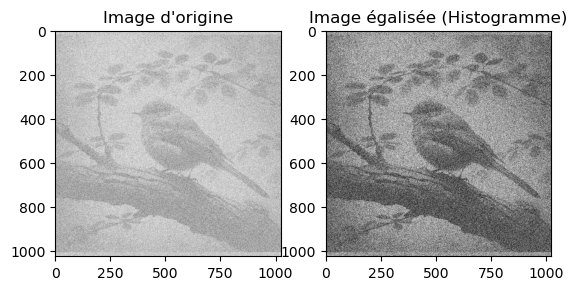

In [22]:

def histogram_equalization(image):
    # Convertir l'image en niveaux de gris si ce n'est pas déjà fait
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Appliquer l'égalisation d'histogramme
    equalized_image = cv2.equalizeHist(image)

    return equalized_image


# Appliquer l'égalisation d'histogramme pour ajuster la luminosité
equalized_image = histogram_equalization(image)

# Afficher les images d'origine et ajustée dans le bloc de sortie du Jupyter Notebook
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image d'origine")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Image égalisée (Histogramme)")

plt.show()

## 	Contraste et luminosité (Contrast and Brightness) 

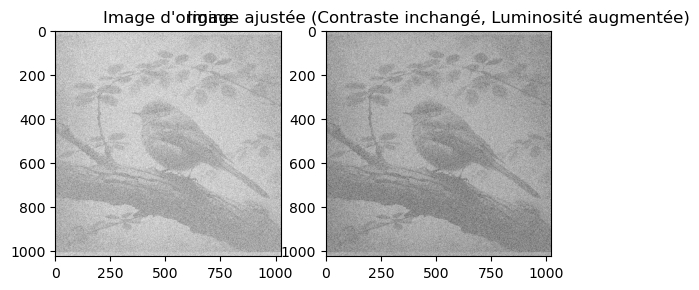

In [29]:
import cv2
import matplotlib.pyplot as plt

def adjust_contrast_and_brightness(image, alpha, beta):
    # Appliquer l'ajustement de contraste et de luminosité
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image



# Ajuster le contraste et augmenter la luminosité pour améliorer la luminosité
contrast_factor = 1.0  
brightness_factor = -30  
# Appliquer l'ajustement de contraste et de luminosité
adjusted_image = adjust_contrast_and_brightness(image, contrast_factor, brightness_factor)

# Afficher les images d'origine et ajustée dans le bloc de sortie du Jupyter Notebook
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image d'origine")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB))
plt.title("Image ajustée (Contraste inchangé, Luminosité augmentée)")

plt.show()


## Le filtre de renforcement du contraste: 

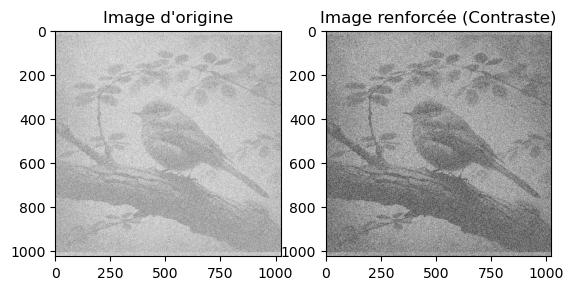

In [36]:
def contrast_enhancement(image, alpha, beta):
    # Appliquer le filtre de renforcement du contraste
    enhanced_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    return enhanced_image



# Ajuster le contraste et la luminosité pour minimiser la luminosité
contrast_factor = 1.5  # Ajuster cette valeur pour modifier le contraste
brightness_factor = -140  # Ajuster cette valeur pour modifier la luminosité

# Appliquer le filtre de renforcement du contraste
enhanced_image = contrast_enhancement(image, contrast_factor, brightness_factor)

# Afficher les images d'origine et ajustée dans le bloc de sortie du Jupyter Notebook
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image d'origine")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title("Image renforcée (Contraste)")

plt.show()

## 	Le Filtre Gamma (Gamma Correction):  

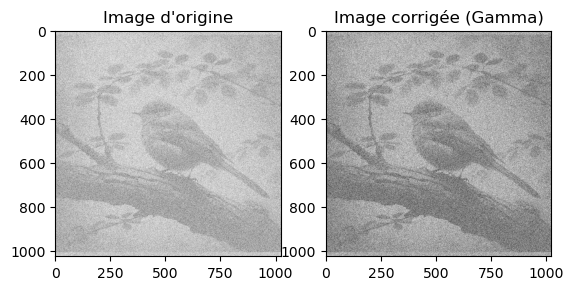

In [42]:
def gamma_correction(image, gamma):
    # Appliquer la correction gamma
    gamma_corrected_image = np.power(image/255.0, gamma) * 255.0
    gamma_corrected_image = gamma_corrected_image.astype(np.uint8)

    return gamma_corrected_image


# Ajuster le paramètre gamma pour minimiser la luminosité
gamma_value = 1.7 

# Appliquer la correction gamma
gamma_corrected_image = gamma_correction(image, gamma_value)

# Afficher les images d'origine et ajustée dans le bloc de sortie du Jupyter Notebook
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image d'origine")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gamma_corrected_image, cv2.COLOR_BGR2RGB))
plt.title("Image corrigée (Gamma)")

plt.show()